# **Error Analysis**#

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
import warnings

warnings.filterwarnings('ignore')
jtplot.style('monokai', grid = False)

In [2]:
from sklearn.model_selection import train_test_split

train_df = pd.read_csv('train.csv', header = 0)
train, test = train_test_split(train_df, test_size = 0.2)
x_train = train.drop(['label'], axis = 1 )
y_train = train['label']
x_test = test.drop(['label'], axis = 1 )
y_test = test['label']

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

In [4]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

sgd = SGDClassifier()
y_pred = cross_val_predict(sgd, x_train_scaled, y_train)
conf_mat = confusion_matrix(y_train, y_pred)
conf_mat

array([[3123,    0,    9,    3,    6,   38,   35,    2,   71,    2],
       [   0, 3579,   20,   16,    0,   23,    6,    5,   81,    6],
       [  16,   20, 2923,   60,   47,   18,   30,   29,  153,    7],
       [  15,   16,   66, 3017,    1,  144,   20,   22,  138,   40],
       [   6,   10,   27,    7, 2952,    8,   23,   13,  104,  120],
       [  25,    9,   15,  108,   38, 2613,   49,   13,  166,   50],
       [  19,   10,   27,    1,   31,   57, 3160,    2,   54,    1],
       [  12,    9,   42,   20,   22,    8,    3, 3191,   43,  151],
       [  13,   42,   22,   63,    3,   72,   17,    7, 2966,   38],
       [  11,    8,   12,   44,   99,   24,    1,   98,  114, 2920]],
      dtype=int64)

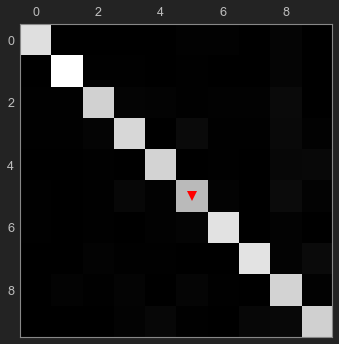

In [5]:
plt.matshow(conf_mat, cmap = plt.cm.gray)
plt.plot(5,5,marker = 'v', c = 'red', ms = 10)

**It seems that 5 is darker than other numbers.**

**It means the model can't recognize 5 like other numbers.**

**And next, let's focus on error part.**

**Calculate the error ratio of each image.**

In [6]:
row_sum = conf_mat.sum(axis = 1, keepdims = True)
norm_conf_mat = conf_mat / row_sum
np.fill_diagonal(norm_conf_mat, 0)

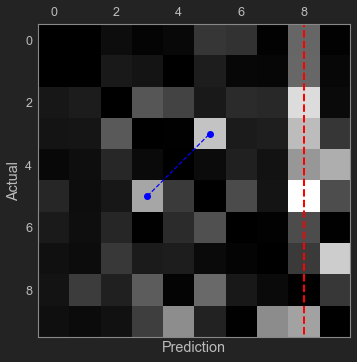

In [21]:
plt.matshow(norm_conf_mat, cmap = plt.cm.gray)
plt.xlabel('Prediction'); plt.ylabel('Actual'); plt.xlim(-0.5,9.5); plt.ylim(9.5,-0.5)
plt.plot([8,8],[-1,10], linestyle = '--', c = 'red', linewidth = 2)
plt.plot([3,5],[5,3], marker = 'o', c = 'blue', ms = 7, linestyle = '--')

**Many not 8 images are classified as 8.**

**But 8 images are properly classified as 8.**

**And the model is confused between 3 and 5.**